In [2]:
#Split location-only results by MA and cone angle.

import pandas as pd
import numpy as np
import datetime as dt
import glob

from XMA_finder import XMA_finder
#from histo_plot_lower_vmax import histo_plot
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

#import modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
XMA_all = 10

In [6]:
##load Cluster CSVs

list_all = []

path = "/Users/apx059/Documents/Integrated_CSVs_2003/**"

for path in glob.glob(path, recursive=True):
    list_all.append(path)
    
#list with only files, not folders
cl_file_list = []

for element in list_all:
    if '.csv' in element:
        if not 'OMNI' in element:
            cl_file_list.append(element)

cl_dfs = []

for file in cl_file_list:
    df = pd.read_csv(file,encoding='utf-8')
    df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')
    df.set_index('datetime', inplace = True)
    cl_dfs.append(df)

In [5]:
cl_dfs[0]

,GIPM X (OMNI mean),GIPM Y (OMNI mean),GIPM Z (OMNI mean),GIPM X (OMNI median),GIPM Y (OMNI median),GIPM Z (OMNI median),B min/Bomni,B mean/Bomni,B max/Bomni,B median/Bomni,...,IMF V (median),IMF Np (mean),IMF Np (median),OMNI Dist from X line (mean),OMNI Dist from X line (median),Max IMF Deviation,ULF Band Compressive Power,ULF Band Transverse Power,ULF Band Normalised Compressive Power,ULF Band Normalised Transverse Power
datetime,,,,,,,,,,,,,,,,,,,,,
2003-01-11 03:15:00,9.276710,4.365960,-15.089300,9.225068,3.041053,-15.443505,0.786156,1.120269,1.475464,1.126925,...,439.80,5.313000,5.270,12.336626,12.337485,43.684974,0.029674,0.081030,4.896474e-04,0.001337
2003-01-11 03:19:00,9.412090,9.316102,-12.397707,9.543019,11.647684,-10.171699,0.793524,1.013405,1.167368,1.019624,...,436.55,5.195000,5.225,12.264663,12.261163,43.843526,0.087679,0.202172,1.677498e-03,0.003868
2003-01-11 03:23:00,9.283718,10.610544,-11.390673,9.293348,12.681597,-8.983590,0.848649,0.995010,1.305405,0.995405,...,429.15,5.334000,5.305,12.191711,12.196071,35.598592,0.117124,1.302163,2.160374e-03,0.024019
2003-01-11 03:31:00,9.213683,15.268420,-0.489158,9.294190,14.804235,3.643758,0.862453,0.938316,1.035293,0.938137,...,428.65,4.838000,4.915,12.054729,12.053346,66.331598,0.011470,0.273987,2.345962e-04,0.005604
2003-01-11 03:47:00,9.341968,11.847134,9.232138,9.343634,11.196295,9.936362,0.239890,1.503051,5.474810,1.103520,...,433.00,4.560000,4.460,11.867866,11.880885,36.897956,5.148782,2.759426,4.341905e-02,0.023270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-01-12 01:11:00,3.561649,-0.511831,-6.846402,3.553803,-0.515295,-6.821033,10.602607,10.750169,10.872548,10.759752,...,407.15,2.865000,2.810,33.541625,33.542859,16.074638,0.007435,0.076431,1.056962e-06,0.000011
2003-01-12 01:15:00,3.454383,-0.800679,-6.808514,3.458601,-0.877097,-6.818533,10.944315,11.059815,11.175065,11.063825,...,409.25,2.840000,2.875,33.542859,33.542859,13.521903,0.002425,0.037259,3.309858e-07,0.000005
2003-01-12 01:19:00,3.396076,-1.000017,-6.744567,3.409435,-0.996586,-6.782865,11.262250,11.388396,11.567463,11.379800,...,408.80,2.838889,2.930,33.547799,33.542859,17.188860,0.003076,0.058825,4.027909e-07,0.000008


In [8]:
#make new dataframes split by 1. cone angle and 2. MA
cl_all = pd.concat(cl_dfs)

df_radial = cl_all.loc[(cl_all['cone angle (mean)'] < 30) & (cl_all['GIPM X (OMNI mean)'].notnull())]
df_spiral = cl_all.loc[(cl_all['cone angle (mean)'] > 30) & (cl_all['cone angle (mean)'] < 60) & (cl_all['GIPM X (OMNI mean)'].notnull())]
df_perpendicular = cl_all.loc[(cl_all['cone angle (mean)'] > 60) & (cl_all['GIPM X (OMNI mean)'].notnull())]

In [21]:
#make new MEDIAN dataframes split by 1. cone angle and 2. MA

df_radial_med = cl_all.loc[(cl_all['cone angle (median)'] < 30) & (cl_all['GIPM X (OMNI median)'].notnull())]
df_spiral_med = cl_all.loc[(cl_all['cone angle (median)'] > 30) & (cl_all['cone angle (median)'] < 60) & (cl_all['GIPM X (OMNI median)'].notnull())]
df_perpendicular_med = cl_all.loc[(cl_all['cone angle (median)'] > 60) & (cl_all['GIPM X (OMNI median)'].notnull())]

In [9]:
#now break up by MA. MA ranges <5, 5-10, 10-15, 15-20, >20

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z (OMNI mean)'] < 5) & (df_radial['GIPM Z (OMNI mean)'] > -5)]
df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z (OMNI mean)'] < 5) & (df_spiral['GIPM Z (OMNI mean)'] > -5)]
df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z (OMNI mean)'] < 5) & (df_perpendicular['GIPM Z (OMNI mean)'] > -5)]

#reference all X, Y, and Z

x_locs_rad = df_rad_lowZ['GIPM X (OMNI mean)'].to_numpy()
y_locs_rad = df_rad_lowZ['GIPM Y (OMNI mean)'].to_numpy()
z_locs_rad = df_rad_lowZ['GIPM Z (OMNI mean)'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_rad, xedg, yedg = np.histogram2d(x_locs_rad, y_locs_rad, bins=[x_bin_edges, y_bin_edges])
HistXY_rad = HistXY_rad.T

z_bin_edges = range(-30,30)
HistXZ_rad, xedg, zedg = np.histogram2d(x_locs_rad, z_locs_rad, bins=[x_bin_edges, z_bin_edges])
HistXZ_rad = HistXZ_rad.T

HistXY_rad[HistXY_rad == 0] = np.nan
HistXZ_rad[HistXZ_rad == 0] = np.nan

#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z (OMNI mean)'] < 5) & (df_spiral['GIPM Z (OMNI mean)'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X (OMNI mean)'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y (OMNI mean)'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z (OMNI mean)'].to_numpy()


##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan

################perpendicular 
#reference all X, Y, and Z

df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z (OMNI mean)'] < 5) & (df_perpendicular['GIPM Z (OMNI mean)'] > -5)]

x_locs_perp = df_perp_lowZ['GIPM X (OMNI mean)'].to_numpy()
y_locs_perp = df_perp_lowZ['GIPM Y (OMNI mean)'].to_numpy()
z_locs_perp = df_perp_lowZ['GIPM Z (OMNI mean)'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_perp, xedg, yedg = np.histogram2d(x_locs_perp, y_locs_perp, bins=[x_bin_edges, y_bin_edges])
HistXY_perp = HistXY_perp.T

z_bin_edges = range(-30,30)
HistXZ_perp, xedg, zedg = np.histogram2d(x_locs_perp, z_locs_perp, bins=[x_bin_edges, z_bin_edges])
HistXZ_perp = HistXZ_perp.T

HistXY_perp[HistXY_perp == 0] = np.nan
HistXZ_perp[HistXZ_perp == 0] = np.nan

In [7]:
#now break up by MA, lowZ. MA ranges <5, 5-10, 10-15, >15

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]
df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]
df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

#radial
df_rad_less5 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] < 5)]
df_rad_5_10 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 5) & (df_rad_lowZ['M_A'] < 10))]
df_rad_10_15 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 10) & (df_rad_lowZ['M_A'] < 15))]
df_rad_15more = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 15)]

#spiral 

df_spir_less5 = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] < 5)]
df_spir_5_10 = df_spir_lowZ.loc[((df_spir_lowZ['M_A'] >= 5) & df_spir_lowZ['M_A'] < 10)]
df_spir_10_15 = df_spir_lowZ.loc[((df_spir_lowZ['M_A'] >= 10) & df_spir_lowZ['M_A'] < 15)]
df_spir_15more = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] >= 15)]

#perpendicular

df_perp_less5 = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] < 5)]
df_perp_5_10 = df_perp_lowZ.loc[((df_perp_lowZ['M_A'] >= 5) & (df_perp_lowZ['M_A'] < 10))]
df_perp_10_15 = df_perp_lowZ.loc[((df_perp_lowZ['M_A'] >= 10) & (df_perp_lowZ['M_A'] < 15))]
df_perp_15more = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] >= 15)]

#break up into radial, 
#reference all X, Y, and Z

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]

x_locs_rad = df_rad_lowZ['GIPM X'].to_numpy()
y_locs_rad = df_rad_lowZ['GIPM Y'].to_numpy()
z_locs_rad = df_rad_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_rad, xedg, yedg = np.histogram2d(x_locs_rad, y_locs_rad, bins=[x_bin_edges, y_bin_edges])
HistXY_rad = HistXY_rad.T

z_bin_edges = range(-30,30)
HistXZ_rad, xedg, zedg = np.histogram2d(x_locs_rad, z_locs_rad, bins=[x_bin_edges, z_bin_edges])
HistXZ_rad = HistXZ_rad.T

HistXY_rad[HistXY_rad == 0] = np.nan
HistXZ_rad[HistXZ_rad == 0] = np.nan

#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan

################perpendicular 
#reference all X, Y, and Z

df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

x_locs_perp = df_perp_lowZ['GIPM X'].to_numpy()
y_locs_perp = df_perp_lowZ['GIPM Y'].to_numpy()
z_locs_perp = df_perp_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_perp, xedg, yedg = np.histogram2d(x_locs_perp, y_locs_perp, bins=[x_bin_edges, y_bin_edges])
HistXY_perp = HistXY_perp.T

z_bin_edges = range(-30,30)
HistXZ_perp, xedg, zedg = np.histogram2d(x_locs_perp, z_locs_perp, bins=[x_bin_edges, z_bin_edges])
HistXZ_perp = HistXZ_perp.T

HistXY_perp[HistXY_perp == 0] = np.nan
HistXZ_perp[HistXZ_perp == 0] = np.nan

In [8]:
#finer binned hists
x_bin_edges = range(30)
y_bin_edges = range(-30,30)

#########RADIAL######

###BELOW 5MA

x_locs_rad_less5 = df_rad_less5['GIPM X'].to_numpy()
y_locs_rad_less5 = df_rad_less5['GIPM Y'].to_numpy()

HistXY_rad_less5, xedg, yedg = np.histogram2d(x_locs_rad_less5, y_locs_rad_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_less5 = HistXY_rad_less5.T

###5-10 MA

x_locs_rad_5_10 = df_rad_5_10['GIPM X'].to_numpy()
y_locs_rad_5_10 = df_rad_5_10['GIPM Y'].to_numpy()

HistXY_rad_5_10, xedg, zedg = np.histogram2d(x_locs_rad_5_10, y_locs_rad_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_5_10 = HistXY_rad_5_10.T

###10-15 MA

x_locs_rad_10_15 = df_rad_10_15['GIPM X'].to_numpy()
y_locs_rad_10_15 = df_rad_10_15['GIPM Y'].to_numpy()

HistXY_rad_10_15, xedg, zedg = np.histogram2d(x_locs_rad_10_15, y_locs_rad_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_10_15 = HistXY_rad_10_15.T

###OVER 15MA

x_locs_rad_15more = df_rad_15more['GIPM X'].to_numpy()
y_locs_rad_15more= df_rad_15more['GIPM Y'].to_numpy()

HistXY_rad_15more, xedg, yedg = np.histogram2d(x_locs_rad_15more, y_locs_rad_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_15more = HistXY_rad_15more.T

HistXY_rad_less5[HistXY_rad_less5 == 0] = np.nan
HistXY_rad_5_10[HistXY_rad_5_10 == 0] = np.nan
HistXY_rad_10_15[HistXY_rad_10_15 == 0] = np.nan
HistXY_rad_15more[HistXY_rad_15more == 0] = np.nan

#########SPIRAL######

###BELOW 7MA

x_locs_spir_less5 = df_spir_less5['GIPM X'].to_numpy()
y_locs_spir_less5 = df_spir_less5['GIPM Y'].to_numpy()

HistXY_spir_less5, xedg, yedg = np.histogram2d(x_locs_spir_less5, y_locs_spir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_less5 = HistXY_spir_less5.T

###5-10 MA

x_locs_spir_5_10 = df_spir_5_10['GIPM X'].to_numpy()
y_locs_spir_5_10 = df_spir_5_10['GIPM Y'].to_numpy()

HistXY_spir_5_10, xedg, zedg = np.histogram2d(x_locs_spir_5_10, y_locs_spir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_5_10 = HistXY_spir_5_10.T

###10-15 MA

x_locs_spir_10_15 = df_spir_10_15['GIPM X'].to_numpy()
y_locs_spir_10_15 = df_spir_10_15['GIPM Y'].to_numpy()

HistXY_spir_10_15, xedg, zedg = np.histogram2d(x_locs_spir_10_15, y_locs_spir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_10_15 = HistXY_spir_10_15.T

###OVER 15MA
x_locs_spir_15more = df_spir_15more['GIPM X'].to_numpy()
y_locs_spir_15more = df_spir_15more['GIPM Y'].to_numpy()

HistXY_spir_15more, xedg, yedg = np.histogram2d(x_locs_spir_15more, y_locs_spir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_15more = HistXY_spir_15more.T

HistXY_spir_less5[HistXY_spir_less5 == 0] = np.nan
HistXY_spir_5_10[HistXY_spir_5_10 == 0] = np.nan
HistXY_spir_10_15[HistXY_spir_10_15 == 0] = np.nan
HistXY_spir_15more[HistXY_spir_15more == 0] = np.nan

#####PERPENDICULAR

###BELOW 5MA

x_locs_perp_less5 = df_perp_less5['GIPM X'].to_numpy()
y_locs_perp_less5 = df_perp_less5['GIPM Y'].to_numpy()

HistXY_perp_less5, xedg, yedg = np.histogram2d(x_locs_perp_less5, y_locs_perp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_less5 = HistXY_perp_less5.T

###5-10 MA

x_locs_perp_5_10 = df_perp_5_10['GIPM X'].to_numpy()
y_locs_perp_5_10 = df_perp_5_10['GIPM Y'].to_numpy()

HistXY_perp_5_10, xedg, zedg = np.histogram2d(x_locs_perp_5_10, y_locs_perp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_5_10 = HistXY_perp_5_10.T

###10-15 MA

x_locs_perp_10_15 = df_perp_10_15['GIPM X'].to_numpy()
y_locs_perp_10_15 = df_perp_10_15['GIPM Y'].to_numpy()

HistXY_perp_10_15, xedg, zedg = np.histogram2d(x_locs_perp_10_15, y_locs_perp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_10_15 = HistXY_perp_10_15.T

###OVER 15MA
x_locs_perp_15more = df_perp_15more['GIPM X'].to_numpy()
y_locs_perp_15more = df_perp_15more['GIPM Y'].to_numpy()

HistXY_perp_15more, xedg, yedg = np.histogram2d(x_locs_perp_15more, y_locs_perp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_15more = HistXY_perp_15more.T

HistXY_perp_less5[HistXY_perp_less5 == 0] = np.nan
HistXY_perp_5_10[HistXY_perp_5_10 == 0] = np.nan
HistXY_perp_10_15[HistXY_perp_10_15 == 0] = np.nan
HistXY_perp_15more[HistXY_perp_15more == 0] = np.nan




In [9]:
#same but finer angle bins

#########RADIAL######
df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]
#radial
df_rad_less5 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] < 5)]
df_rad_5_10 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 5) & (df_rad_lowZ['M_A'] < 10))]
df_rad_10_15 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 10) & (df_rad_lowZ['M_A'] < 15))]
df_rad_15more = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 15)]

###BELOW 5MA

x_locs_rad_less5 = df_rad_less5['GIPM X'].to_numpy()
y_locs_rad_less5 = df_rad_less5['GIPM Y'].to_numpy()

HistXY_rad_less5, xedg, yedg = np.histogram2d(x_locs_rad_less5, y_locs_rad_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_less5 = HistXY_rad_less5.T

###5-10 MA

x_locs_rad_5_10 = df_rad_5_10['GIPM X'].to_numpy()
y_locs_rad_5_10 = df_rad_5_10['GIPM Y'].to_numpy()

HistXY_rad_5_10, xedg, zedg = np.histogram2d(x_locs_rad_5_10, y_locs_rad_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_5_10 = HistXY_rad_5_10.T

###10-15 MA

x_locs_rad_10_15 = df_rad_10_15['GIPM X'].to_numpy()
y_locs_rad_10_15 = df_rad_10_15['GIPM Y'].to_numpy()

HistXY_rad_10_15, xedg, zedg = np.histogram2d(x_locs_rad_10_15, y_locs_rad_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_10_15 = HistXY_rad_10_15.T

###OVER 15MA

x_locs_rad_15more = df_rad_15more['GIPM X'].to_numpy()
y_locs_rad_15more= df_rad_15more['GIPM Y'].to_numpy()

HistXY_rad_15more, xedg, yedg = np.histogram2d(x_locs_rad_15more, y_locs_rad_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_15more = HistXY_rad_15more.T

HistXY_rad_less5[HistXY_rad_less5 == 0] = np.nan
HistXY_rad_5_10[HistXY_rad_5_10 == 0] = np.nan
HistXY_rad_10_15[HistXY_rad_10_15 == 0] = np.nan
HistXY_rad_15more[HistXY_rad_15more == 0] = np.nan

df_lowspiral = cl_all.loc[(cl_all['cone angle'] > 30) & (cl_all['cone angle'] < 45) & (cl_all['GIPM X'].notnull())]
df_highspiral = cl_all.loc[(cl_all['cone angle'] > 45) & (cl_all['cone angle'] < 60) & (cl_all['GIPM X'].notnull())]
df_lowperpendicular = cl_all.loc[(cl_all['cone angle'] > 60) & (cl_all['cone angle'] < 75) & (cl_all['GIPM X'].notnull())]
df_highperpendicular = cl_all.loc[(cl_all['cone angle'] > 75) & (cl_all['GIPM X'].notnull())]

df_lowspir_lowZ = df_lowspiral.loc[(df_lowspiral['GIPM Z'] < 5) & (df_lowspiral['GIPM Z'] > -5)]
df_lowperp_lowZ = df_lowperpendicular.loc[(df_lowperpendicular['GIPM Z'] < 5) & (df_lowperpendicular['GIPM Z'] > -5)]
df_highspir_lowZ = df_highspiral.loc[(df_highspiral['GIPM Z'] < 5) & (df_highspiral['GIPM Z'] > -5)]
df_highperp_lowZ = df_highperpendicular.loc[(df_highperpendicular['GIPM Z'] < 5) & (df_highperpendicular['GIPM Z'] > -5)]

#finer binned hists
x_bin_edges = range(30)
y_bin_edges = range(-30,30)

#lowspiral 

df_lowspir_less5 = df_lowspir_lowZ.loc[(df_lowspir_lowZ['M_A'] < 5)]
df_lowspir_5_10 = df_lowspir_lowZ.loc[((df_lowspir_lowZ['M_A'] >= 5) & (df_lowspir_lowZ['M_A'] < 10))]
df_lowspir_10_15 = df_lowspir_lowZ.loc[((df_lowspir_lowZ['M_A'] >= 10) & (df_lowspir_lowZ['M_A'] < 15))]
df_lowspir_15more = df_lowspir_lowZ.loc[(df_lowspir_lowZ['M_A'] >= 15)]

#highspiral 

df_highspir_less5 = df_highspir_lowZ.loc[(df_highspir_lowZ['M_A'] < 5)]
df_highspir_5_10 = df_highspir_lowZ.loc[((df_highspir_lowZ['M_A'] >= 5) & (df_highspir_lowZ['M_A'] < 10))]
df_highspir_10_15 = df_highspir_lowZ.loc[((df_highspir_lowZ['M_A'] >= 10) & (df_highspir_lowZ['M_A'] < 15))]
df_highspir_15more = df_highspir_lowZ.loc[(df_highspir_lowZ['M_A'] >= 15)]

#lowperpendicular

df_lowperp_less5 = df_lowperp_lowZ.loc[(df_lowperp_lowZ['M_A'] < 5)]
df_lowperp_5_10 = df_lowperp_lowZ.loc[((df_lowperp_lowZ['M_A'] >= 5) & (df_lowperp_lowZ['M_A'] < 10))]
df_lowperp_10_15 = df_lowperp_lowZ.loc[((df_lowperp_lowZ['M_A'] >= 10) & (df_lowperp_lowZ['M_A'] < 15))]
df_lowperp_15more = df_lowperp_lowZ.loc[(df_lowperp_lowZ['M_A'] >= 15)]

#highperpendicular

df_highperp_less5 = df_highperp_lowZ.loc[(df_highperp_lowZ['M_A'] < 5)]
df_highperp_5_10 = df_highperp_lowZ.loc[((df_highperp_lowZ['M_A'] >= 5) & (df_highperp_lowZ['M_A'] < 10))]
df_highperp_10_15 = df_highperp_lowZ.loc[((df_highperp_lowZ['M_A'] >= 10) & (df_highperp_lowZ['M_A'] < 15))]
df_highperp_15more = df_highperp_lowZ.loc[(df_highperp_lowZ['M_A'] >= 15)]


#########LOWSPIRAL######
###BELOW 5MA

x_locs_lowspir_less5 = df_lowspir_less5['GIPM X'].to_numpy()
y_locs_lowspir_less5 = df_lowspir_less5['GIPM Y'].to_numpy()

HistXY_lowspir_less5, xedg, yedg = np.histogram2d(x_locs_lowspir_less5, y_locs_lowspir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_less5 = HistXY_lowspir_less5.T

###5-10 MA

x_locs_lowspir_5_10 = df_lowspir_5_10['GIPM X'].to_numpy()
y_locs_lowspir_5_10 = df_lowspir_5_10['GIPM Y'].to_numpy()

HistXY_lowspir_5_10, xedg, zedg = np.histogram2d(x_locs_lowspir_5_10, y_locs_lowspir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_5_10 = HistXY_lowspir_5_10.T

###10-15 MA

x_locs_lowspir_10_15 = df_lowspir_10_15['GIPM X'].to_numpy()
y_locs_lowspir_10_15 = df_lowspir_10_15['GIPM Y'].to_numpy()

HistXY_lowspir_10_15, xedg, zedg = np.histogram2d(x_locs_lowspir_10_15, y_locs_lowspir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_10_15 = HistXY_lowspir_10_15.T

###OVER 15MA
x_locs_lowspir_15more = df_lowspir_15more['GIPM X'].to_numpy()
y_locs_lowspir_15more = df_lowspir_15more['GIPM Y'].to_numpy()

HistXY_lowspir_15more, xedg, yedg = np.histogram2d(x_locs_lowspir_15more, y_locs_lowspir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_15more = HistXY_lowspir_15more.T

HistXY_lowspir_less5[HistXY_lowspir_less5 == 0] = np.nan
HistXY_lowspir_5_10[HistXY_lowspir_5_10 == 0] = np.nan
HistXY_lowspir_10_15[HistXY_lowspir_10_15 == 0] = np.nan
HistXY_lowspir_15more[HistXY_lowspir_15more == 0] = np.nan

#########HIGHSPIRAL######
###BELOW 5MA

x_locs_highspir_less5 = df_highspir_less5['GIPM X'].to_numpy()
y_locs_highspir_less5 = df_highspir_less5['GIPM Y'].to_numpy()

HistXY_highspir_less5, xedg, yedg = np.histogram2d(x_locs_highspir_less5, y_locs_highspir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_less5 = HistXY_highspir_less5.T

###5-10 MA

x_locs_highspir_5_10 = df_highspir_5_10['GIPM X'].to_numpy()
y_locs_highspir_5_10 = df_highspir_5_10['GIPM Y'].to_numpy()

HistXY_highspir_5_10, xedg, zedg = np.histogram2d(x_locs_highspir_5_10, y_locs_highspir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_5_10 = HistXY_highspir_5_10.T

###10-15 MA

x_locs_highspir_10_15 = df_highspir_10_15['GIPM X'].to_numpy()
y_locs_highspir_10_15 = df_highspir_10_15['GIPM Y'].to_numpy()

HistXY_highspir_10_15, xedg, zedg = np.histogram2d(x_locs_highspir_10_15, y_locs_highspir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_10_15 = HistXY_highspir_10_15.T

###OVER 15MA
x_locs_highspir_15more = df_highspir_15more['GIPM X'].to_numpy()
y_locs_highspir_15more = df_highspir_15more['GIPM Y'].to_numpy()

HistXY_highspir_15more, xedg, yedg = np.histogram2d(x_locs_highspir_15more, y_locs_highspir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_15more = HistXY_highspir_15more.T

HistXY_highspir_less5[HistXY_highspir_less5 == 0] = np.nan
HistXY_highspir_5_10[HistXY_highspir_5_10 == 0] = np.nan
HistXY_highspir_10_15[HistXY_highspir_10_15 == 0] = np.nan
HistXY_highspir_15more[HistXY_highspir_15more == 0] = np.nan

#####LOW PERPENDICULAR

###BELOW 5MA

x_locs_lowperp_less5 = df_lowperp_less5['GIPM X'].to_numpy()
y_locs_lowperp_less5 = df_lowperp_less5['GIPM Y'].to_numpy()

HistXY_lowperp_less5, xedg, yedg = np.histogram2d(x_locs_lowperp_less5, y_locs_lowperp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_less5 = HistXY_lowperp_less5.T

###5-10 MA

x_locs_lowperp_5_10 = df_lowperp_5_10['GIPM X'].to_numpy()
y_locs_lowperp_5_10 = df_lowperp_5_10['GIPM Y'].to_numpy()

HistXY_lowperp_5_10, xedg, zedg = np.histogram2d(x_locs_lowperp_5_10, y_locs_lowperp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_5_10 = HistXY_lowperp_5_10.T

###10-15 MA

x_locs_lowperp_10_15 = df_lowperp_10_15['GIPM X'].to_numpy()
y_locs_lowperp_10_15 = df_lowperp_10_15['GIPM Y'].to_numpy()

HistXY_lowperp_10_15, xedg, zedg = np.histogram2d(x_locs_lowperp_10_15, y_locs_lowperp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_10_15 = HistXY_lowperp_10_15.T

###OVER 15MA
x_locs_lowperp_15more = df_lowperp_15more['GIPM X'].to_numpy()
y_locs_lowperp_15more = df_lowperp_15more['GIPM Y'].to_numpy()

HistXY_lowperp_15more, xedg, yedg = np.histogram2d(x_locs_lowperp_15more, y_locs_lowperp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_15more = HistXY_lowperp_15more.T

HistXY_lowperp_less5[HistXY_lowperp_less5 == 0] = np.nan
HistXY_lowperp_5_10[HistXY_lowperp_5_10 == 0] = np.nan
HistXY_lowperp_10_15[HistXY_lowperp_10_15 == 0] = np.nan
HistXY_lowperp_15more[HistXY_lowperp_15more == 0] = np.nan

#####HIGH PERPENDICULAR

###BELOW 5MA

x_locs_highperp_less5 = df_highperp_less5['GIPM X'].to_numpy()
y_locs_highperp_less5 = df_highperp_less5['GIPM Y'].to_numpy()

HistXY_highperp_less5, xedg, yedg = np.histogram2d(x_locs_highperp_less5, y_locs_highperp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_less5 = HistXY_highperp_less5.T

###5-10 MA

x_locs_highperp_5_10 = df_highperp_5_10['GIPM X'].to_numpy()
y_locs_highperp_5_10 = df_highperp_5_10['GIPM Y'].to_numpy()

HistXY_highperp_5_10, xedg, zedg = np.histogram2d(x_locs_highperp_5_10, y_locs_highperp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_5_10 = HistXY_highperp_5_10.T

###10-15 MA

x_locs_highperp_10_15 = df_highperp_10_15['GIPM X'].to_numpy()
y_locs_highperp_10_15 = df_highperp_10_15['GIPM Y'].to_numpy()

HistXY_highperp_10_15, xedg, zedg = np.histogram2d(x_locs_highperp_10_15, y_locs_highperp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_10_15 = HistXY_highperp_10_15.T

###OVER 15MA
x_locs_highperp_15more = df_highperp_15more['GIPM X'].to_numpy()
y_locs_highperp_15more = df_highperp_15more['GIPM Y'].to_numpy()

HistXY_highperp_15more, xedg, yedg = np.histogram2d(x_locs_highperp_15more, y_locs_highperp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_15more = HistXY_highperp_15more.T

HistXY_highperp_less5[HistXY_highperp_less5 == 0] = np.nan
HistXY_highperp_5_10[HistXY_highperp_5_10 == 0] = np.nan
HistXY_highperp_10_15[HistXY_highperp_10_15 == 0] = np.nan
HistXY_highperp_15more[HistXY_highperp_15more == 0] = np.nan



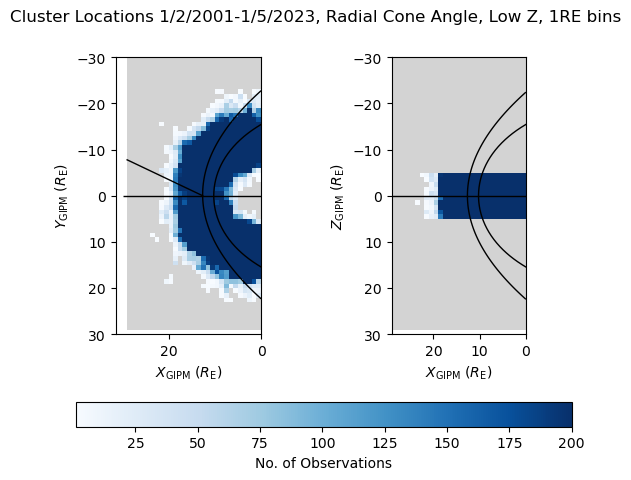

In [10]:
histo_plot(HistXY_rad, HistXZ_rad, XMA_all, xedg, yedg, zedg, 'Cluster Locations 1/2/2001-1/5/2023, Radial Cone Angle, Low Z, 1RE bins',15)

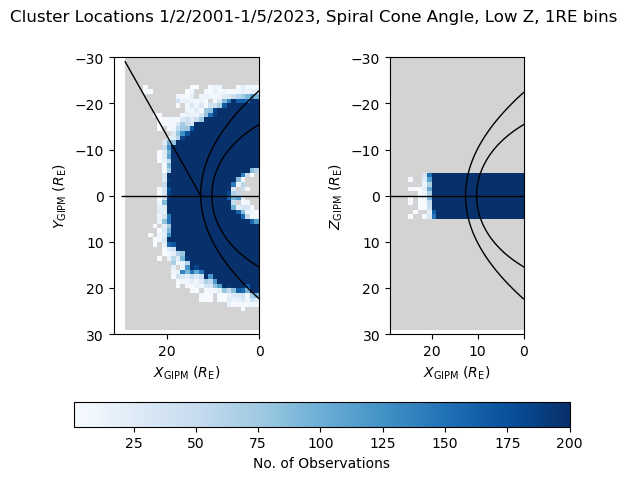

In [11]:
histo_plot(HistXY_spir, HistXZ_spir, XMA_all, xedg, yedg, zedg,'Cluster Locations 1/2/2001-1/5/2023, Spiral Cone Angle, Low Z, 1RE bins',45)

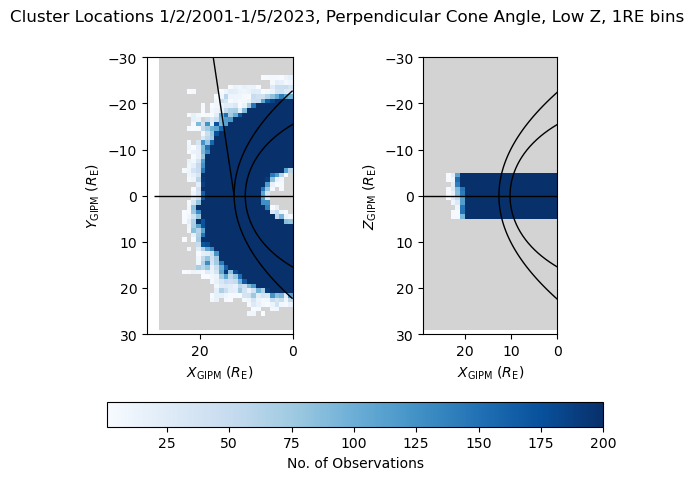

In [12]:
histo_plot(HistXY_perp, HistXZ_perp, XMA_all, xedg, yedg, zedg, 'Cluster Locations 1/2/2001-1/5/2023, Perpendicular Cone Angle, Low Z, 1RE bins',75)

In [ ]:
#histo plot function, 3x3

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#tan_angle = np.tan(np.deg2rad(angle))

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Cluster Locations, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
#cmap = matplotlib.colormaps.get_cmap('Blues') 
#cmap.set_bad(color='lightgrey')
im = ax0.imshow(HistXY_rad_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,22)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='max', label='No. of Observations')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(HistXY_rad_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,22)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(HistXY_rad_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,22)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(HistXY_rad_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,22)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(HistXY_lowspir_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,22)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax5.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax5.imshow(HistXY_lowspir_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,22)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax6.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax6.imshow(HistXY_lowspir_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,22)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax7.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax7.imshow(HistXY_lowspir_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,22)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax8.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax8.imshow(HistXY_highspir_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,22)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax9.imshow(HistXY_highspir_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,22)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax10.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax10.imshow(HistXY_highspir_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,22)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax1.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax11.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax11.imshow(HistXY_highspir_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,22)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

ax12.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax12.imshow(HistXY_lowperp_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,22)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax13.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax13.imshow(HistXY_lowperp_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,22)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax14.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax14.imshow(HistXY_lowperp_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,22)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax15.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax15.imshow(HistXY_lowperp_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,22)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

ax16.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax16.imshow(HistXY_highperp_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,22)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')
#ax17.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax17.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax17.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax17.imshow(HistXY_highperp_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,22)
ax17.invert_xaxis()
ax17.invert_yaxis()

ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')
#ax18.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax18.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax18.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax18.imshow(HistXY_highperp_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,22)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')
#ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax19.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax19.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax19.imshow(HistXY_highperp_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,22)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

In [22]:
#BINNING SCRIPT


def bin_lister(cluster_df, bin_size):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z (OMNI mean)']> -5) & (cluster_df['GIPM Z (OMNI mean)'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??

    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X (OMNI mean)']>= X_lb) & (cluster_df_XY['GIPM X (OMNI mean)'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y (OMNI mean)']>= Y_lb) & (mask['GIPM Y (OMNI mean)'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_ratio_perbin = []

    for j in bin_lists:
        #intermediate list for taking mean
        int_list = []
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            b_rat = mask['B mean/Bomni']
            int_list.extend(b_rat)
        
        if len(int_list) >= 100:
            mean_mean_rat = sum(int_list)/len(int_list)
            mean_ratio_perbin.append(mean_mean_rat)
        
        else:
            #print('binned:', len(int_list))
            mean_ratio_perbin.append(np.nan)
        
    return(mean_ratio_perbin)

def bin_lister_median(cluster_df, bin_size):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z (OMNI median)']> -5) & (cluster_df['GIPM Z (OMNI median)'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??

    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X (OMNI median)']>= X_lb) & (cluster_df_XY['GIPM X (OMNI median)'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y (OMNI median)']>= Y_lb) & (mask['GIPM Y (OMNI median)'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_ratio_perbin = []

    for j in bin_lists:
        #intermediate list for taking mean
        int_list = []
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            b_rat = mask['B mean/Bomni']
            int_list.extend(b_rat)
        
        if len(int_list) >= 100:
            mean_mean_rat = sum(int_list)/len(int_list)
            mean_ratio_perbin.append(mean_mean_rat)
        
        else:
            #print('binned:', len(int_list))
            mean_ratio_perbin.append(np.nan)
        
    return(mean_ratio_perbin)

In [10]:
#plotting function

def binned_plot(rad_list, spir_list, perp_list, bin_size, x_limit, y_limit):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,4)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    minus_y_limit = (-1)*y_limit


    ###################
    fig = plt.figure(figsize=(8, 5.5))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(1, 3, sharey=False)
    #gs = gridspec.GridSpec(2, 2)
    subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023,GIPM')

    #RADIAL

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(rad_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[0]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'$\alpha$ = 0-30$\degree$')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.xaxis.set_minor_locator(MultipleLocator(5))
    ax0.yaxis.set_minor_locator(MultipleLocator(5))
    
    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_0)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    ax0.set_ylim(minus_y_limit,y_limit)
    ax0.set_xlim(0,x_limit)
    ax0.invert_xaxis()
    ax0.invert_yaxis()


    ax1 = axsLeft[1]

    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_1)

    #want to also have line for just solar wind flow along y=0


    col_array_1 = np.array(spir_list)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    ax1.set_aspect('equal')
    ax1.set_title(r'$\alpha$ = 30-60$\degree$')
    ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylim(minus_y_limit,y_limit)
    ax1.set_xlim(0,x_limit)
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    ax1.xaxis.set_minor_locator(MultipleLocator(5))
    ax1.yaxis.set_minor_locator(MultipleLocator(5))
    #fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=ax1)

    #PERP

    col_array_2 = np.array(perp_list)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2 = axsLeft[2]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_2)

    #want to also have line for just solar wind flow along y=0

    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    ax2.set_title(r'$\alpha$ = 60-90$\degree$')
    ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylim(minus_y_limit,y_limit)
    ax2.set_xlim(0,x_limit)
    ax2.invert_xaxis()
    ax2.xaxis.set_minor_locator(MultipleLocator(5))
    ax2.yaxis.set_minor_locator(MultipleLocator(5))
    ax2.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.4), pad=0.3, ax=axsLeft,extend='max', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #colorbar = subfigs.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft, location='bottom', label='Bcluster/Bomni')
    plt.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)
    
    filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    plt.savefig(filename, format='png', dpi = 300)

    #plt.show()


In [18]:
#plotting function

def binned_plot(rad_list, spir_list, perp_list, bin_size, x_limit, y_limit):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,4)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    minus_y_limit = (-1)*y_limit


    ###################
    fig = plt.figure(figsize=(8, 5.5))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(1, 3, sharey=False)
    #gs = gridspec.GridSpec(2, 2)
    subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023,GIPM')
    title_list = [r'$\alpha$ = 0-30$\degree$',r'$\alpha$ = 30-60$\degree$',r'$\alpha$ = 60-90$\degree$']
    angle_list = [tan_angle_0, tan_angle_1, tan_angle_2]
    
    start_index = 0
    
    for ax, Bmap, title, tan_angle in zip(['ax0', 'ax1', 'ax2'], [rad_list, spir_list, perp_list], title_list, angle_list):

        x_mesh = np.arange(0, 25, bin_size) 
        y_mesh = np.arange(-26, 26, bin_size)
        col_array_r = np.array(Bmap)
        x_bin_ticks = int(25/bin_size)
        y_bin_ticks = int(52/bin_size)
        color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
        color_grid_r = np.rot90(color_grid_r)
        color_grid_r = np.flipud(color_grid_r)

        ax = axsLeft[start_index]
        ax.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
        ax.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
        ax.plot(X_shue, R_shue, linewidth=1, color='k')

        ax.set_aspect('equal')
        ax.set_title(title)
        ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        ax.xaxis.set_minor_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(2))
    
        #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
        #without exceeding current bounds of plot
        inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
        X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

        x_s = X_BS_nose
        y_s = 0
        x_e = 25
        y_e = x_e*(-tan_angle)

        #want to also have line for just solar wind flow along y=0

        ax.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
        ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
        ax.set_ylim(minus_y_limit,y_limit)
        ax.set_xlim(0,x_limit)
        ax.invert_xaxis()
        ax.invert_yaxis()
        
        start_index = start_index+1

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.4), pad=0.3, ax=axsLeft,extend='max', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #colorbar = subfigs.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft, location='bottom', label='Bcluster/Bomni')
    plt.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)

    #filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    #plt.savefig(filename, format='png', dpi = 300)

    plt.show()


In [19]:
mean_rat_rad = bin_lister(df_radial, 1)
mean_rat_spir = bin_lister(df_spiral, 1)
mean_rat_perp = bin_lister(df_perpendicular, 1)

In [23]:
mean_rat_rad_med = bin_lister(df_radial_med, 1)
mean_rat_spir_med = bin_lister(df_spiral_med, 1)
mean_rat_perp_med = bin_lister(df_perpendicular_med, 1)

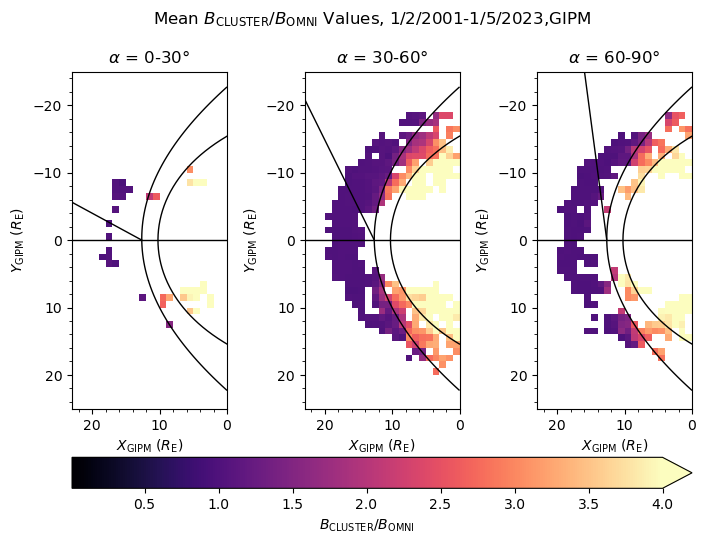

In [20]:
binned_plot(mean_rat_rad, mean_rat_spir, mean_rat_perp, 1, x_limit=23, y_limit=25)

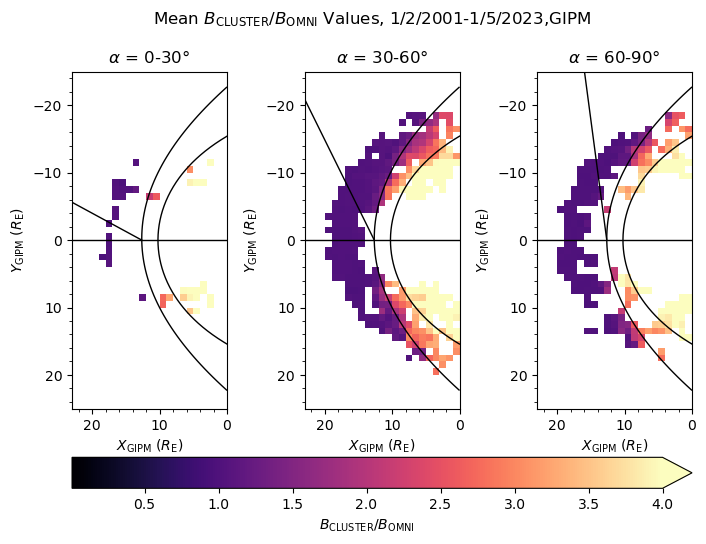

In [24]:
binned_plot(mean_rat_rad_med, mean_rat_spir_med, mean_rat_perp_med, 1, x_limit=23, y_limit=25)

In [107]:
#plotting function

def binned_plot_MA_test(rad_list, spir_list, perp_list, bin_size, x_limit, y_limit):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs_1 = merka05_surface_eq_array_GIPM(14)
    fitting_coeffs_2 = merka05_surface_eq_array_GIPM(6)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f_1 = fitting_coeffs_1[0]*Xn**2 + fitting_coeffs_1[1]*Yn**2 + fitting_coeffs_1[2]*Zn**2+ 2*fitting_coeffs_1[3]*Xn*Yn + 2*fitting_coeffs_1[4]*Yn*Zn + 2*fitting_coeffs_1[5]*Xn*Zn + 2*fitting_coeffs_1[6]*Xn+2*fitting_coeffs_1[7]*Yn + 2*fitting_coeffs_1[8]*Zn + fitting_coeffs_1[9]
    f_2 = fitting_coeffs_2[0]*Xn**2 + fitting_coeffs_2[1]*Yn**2 + fitting_coeffs_2[2]*Zn**2+ 2*fitting_coeffs_2[3]*Xn*Yn + 2*fitting_coeffs_2[4]*Yn*Zn + 2*fitting_coeffs_2[5]*Xn*Zn + 2*fitting_coeffs_2[6]*Xn+2*fitting_coeffs_2[7]*Yn + 2*fitting_coeffs_2[8]*Zn + fitting_coeffs_2[9]
    
    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    minus_y_limit = (-1)*y_limit


    ###################
    fig = plt.figure(figsize=(8, 5.5))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(1, 3, sharey=False)
    #gs = gridspec.GridSpec(2, 2)
    subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023,GIPM')
    title_list = [r'$\alpha$ = 0-30$\degree$',r'$\alpha$ = 30-60$\degree$',r'$\alpha$ = 60-90$\degree$']
    angle_list = [tan_angle_0, tan_angle_1, tan_angle_2]
    
    start_index = 0
    
    for ax, Bmap, title, tan_angle in zip([ax0, ax1, ax2], [rad_list, spir_list, perp_list], title_list, angle_list):

        x_mesh = np.arange(0, 25, bin_size) 
        y_mesh = np.arange(-26, 26, bin_size)
        col_array_r = np.array(Bmap)
        x_bin_ticks = int(25/bin_size)
        y_bin_ticks = int(52/bin_size)
        color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
        color_grid_r = np.rot90(color_grid_r)
        color_grid_r = np.flipud(color_grid_r)

        ax = axsLeft[start_index]
        ax.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
        ax.contour(Xgipm[:,:,0],Ygipm[:,:,0],f_1[:,:,0],levels = [0],colors="black",linewidths=1)
        ax.contour(Xgipm[:,:,0],Ygipm[:,:,0],f_2[:,:,0],levels = [0],colors="red",linewidths=1)
        ax.plot(X_shue, R_shue, linewidth=1, color='k')

        ax.set_aspect('equal')
        ax.set_title(title)
        ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        ax.xaxis.set_minor_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(2))
    
        #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
        #without exceeding current bounds of plot
        inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
        X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

        x_s = X_BS_nose
        y_s = 0
        x_e = 25
        y_e = x_e*(-tan_angle)

        #want to also have line for just solar wind flow along y=0

        ax.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
        ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
        ax.set_ylim(minus_y_limit,y_limit)
        ax.set_xlim(0,x_limit)
        ax.invert_xaxis()
        ax.invert_yaxis()
        
        start_index = start_index+1

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.4), pad=0.3, ax=axsLeft,extend='max', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #colorbar = subfigs.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft, location='bottom', label='Bcluster/Bomni')
    plt.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)
    
    #filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    #plt.savefig(filename, format='png', dpi = 300)

    plt.show()


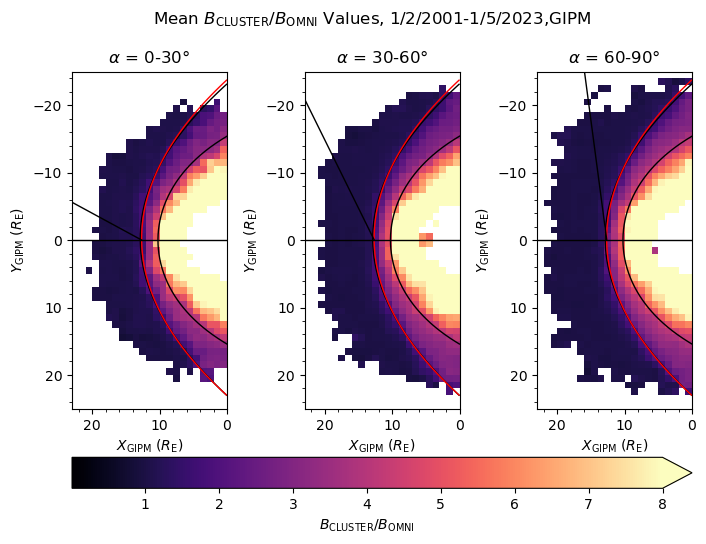

In [108]:
binned_plot_MA_test(mean_rat_rad, mean_rat_spir, mean_rat_perp, 1, x_limit=23, y_limit=25)

In [20]:
omni_all_nodup = omni_all.drop_duplicates()

In [3]:
omni_all.describe()

,Np,B_mag,V_gse,B_X_gse,B_Y_gse,B_Z_gse,V_X_gse,V_Y_gse,V_Z_gse,M_A,cone angle,Norm Bx,Norm By,Norm Bz
count,6.441048e+06,6.441048e+06,6.441048e+06,6.441048e+06,6.441048e+06,6.441048e+06,6.441048e+06,6.441048e+06,6.441048e+06,6.441048e+06,6.441034e+06,6.441048e+06,6.441048e+06,6.441048e+06
mean,5.955116e+00,5.508141e+00,4.336423e+02,5.386206e-02,-1.314449e-01,2.963762e-02,-4.324517e+02,-6.973624e-01,-3.336351e+00,1.036887e+01,5.542336e+01,1.004562e-02,-2.318627e-02,-2.794412e-04
std,4.614853e+00,2.878254e+00,1.044168e+02,3.447651e+00,3.851688e+00,2.961780e+00,1.040179e+02,2.329519e+01,2.102545e+01,5.572640e+00,1.964793e+01,5.869619e-01,6.009718e-01,4.435553e-01
min,3.000000e-02,2.000000e-01,2.315000e+02,-4.363600e+01,-3.238500e+01,-4.679400e+01,-1.041933e+03,-3.017700e+02,-2.161111e+02,4.000000e-01,0.000000e+00,-1.020593e+00,-1.040677e+00,-1.572816e+00
25%,3.090000e+00,3.666000e+00,3.533143e+02,-2.433750e+00,-2.628000e+00,-1.519000e+00,-4.925600e+02,-1.411111e+01,-1.497000e+01,7.325000e+00,4.071959e+01,-5.287244e-01,-5.827152e-01,-3.313123e-01
50%,4.673333e+00,4.845000e+00,4.111750e+02,9.500000e-02,-1.820000e-01,-1.111111e-03,-4.099300e+02,-2.328571e+00,-3.320000e+00,9.420000e+00,5.690742e+01,2.155887e-02,-4.370990e-02,-2.823266e-04
75%,7.323333e+00,6.603000e+00,4.941333e+02,2.563333e+00,2.424444e+00,1.510000e+00,-3.524333e+02,1.065000e+01,7.940000e+00,1.198889e+01,7.179692e+01,5.448997e-01,5.387698e-01,3.282286e-01
max,7.095000e+01,5.593000e+01,1.042989e+03,2.391400e+01,3.876400e+01,3.848125e+01,-2.314000e+02,2.716500e+02,2.905000e+02,2.701250e+02,9.000000e+01,1.010761e+00,1.051591e+00,1.000000e+00


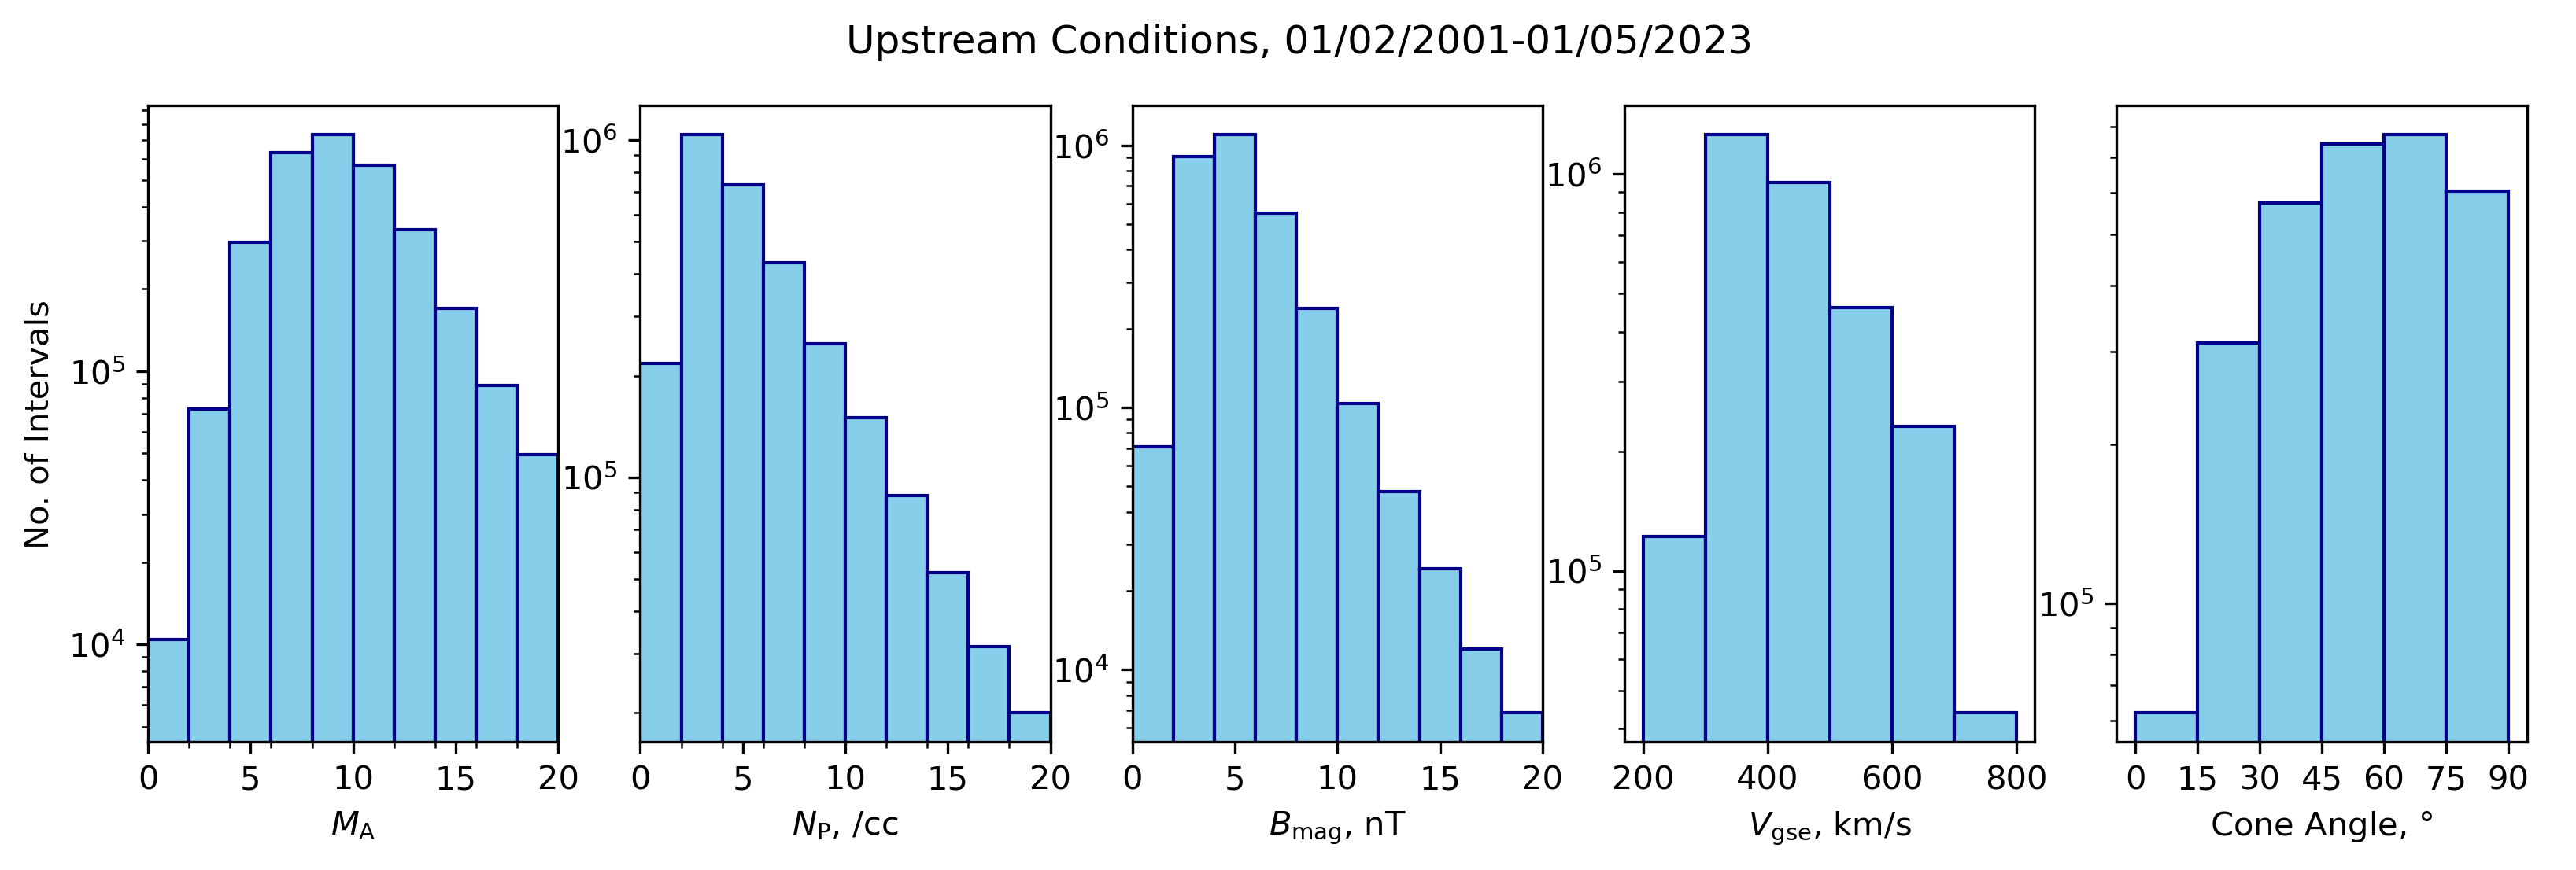

In [21]:
fig, ax = plt.subplots(figsize=(13, 3.5), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=False)
subfigs.suptitle(r'Upstream Conditions, 01/02/2001-01/05/2023')

ax0 = axsLeft[0]

#ax0.set_title(r'$M_\mathrm{A}$', fontsize=10)
ax0.hist(omni_all_nodup['M_A'],bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,28,32,36,40,50], facecolor='skyblue', edgecolor='darkblue')
ax0.set_yscale('log')
ax0.set_ylabel('No. of Intervals')
ax0.set_xlabel(r'$M_\mathrm{A}$')
ax0.set_xlim(0,20)
ax0.xaxis.set_minor_locator(MultipleLocator(2))


ax1 = axsLeft[1]

#ax1.set_title(r'$N_\mathrm{P}$', fontsize=10)
ax1.hist(omni_all_nodup['Np'], bins=[0,2,4,6,8,10,12,14,16,18,20], facecolor='skyblue', edgecolor='darkblue')
ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.set_yscale('log')
ax1.set_xlabel(r'$N_\mathrm{P}$, /cc')
ax1.set_xlim(0,20)

ax2 = axsLeft[2]

#ax2.set_title(r'$B_\mathrm{mag}$', fontsize=10)
ax2.hist(omni_all_nodup['B_mag'],bins=[0,2,4,6,8,10,12,14,16,18,20], facecolor='skyblue', edgecolor='darkblue')
ax2.set_xlim(0,20)
ax2.set_xlabel(r'$B_\mathrm{mag}$, nT')
ax2.set_yscale('log')

ax3 = axsLeft[3]

#ax3.set_title(r'$V_\mathrm{gse}$', fontsize=10)
ax3.hist(omni_all_nodup['V_gse'],[200,300,400,500,600,700,800], facecolor='skyblue', edgecolor='darkblue')
ax3.set_xlabel(r'$V_\mathrm{gse}$, km/s')
ax3.set_yscale('log')

ax4 = axsLeft[4]

#ax4.set_title('Cone Angle', fontsize=10)
ax4.hist(omni_all_nodup['cone angle'], bins=[0,15, 30,45,60,75,90], facecolor='skyblue', edgecolor='darkblue')
ax4.set_xticks(ticks=[0,15, 30,45,60,75,90], labels=['0','15','30','45','60','75','90'])
ax4.set_xlabel(r'Cone Angle, $\degree$')
ax4.set_yscale('log')



Text(0.5, 0, '$\\alpha$, $\\degree$')

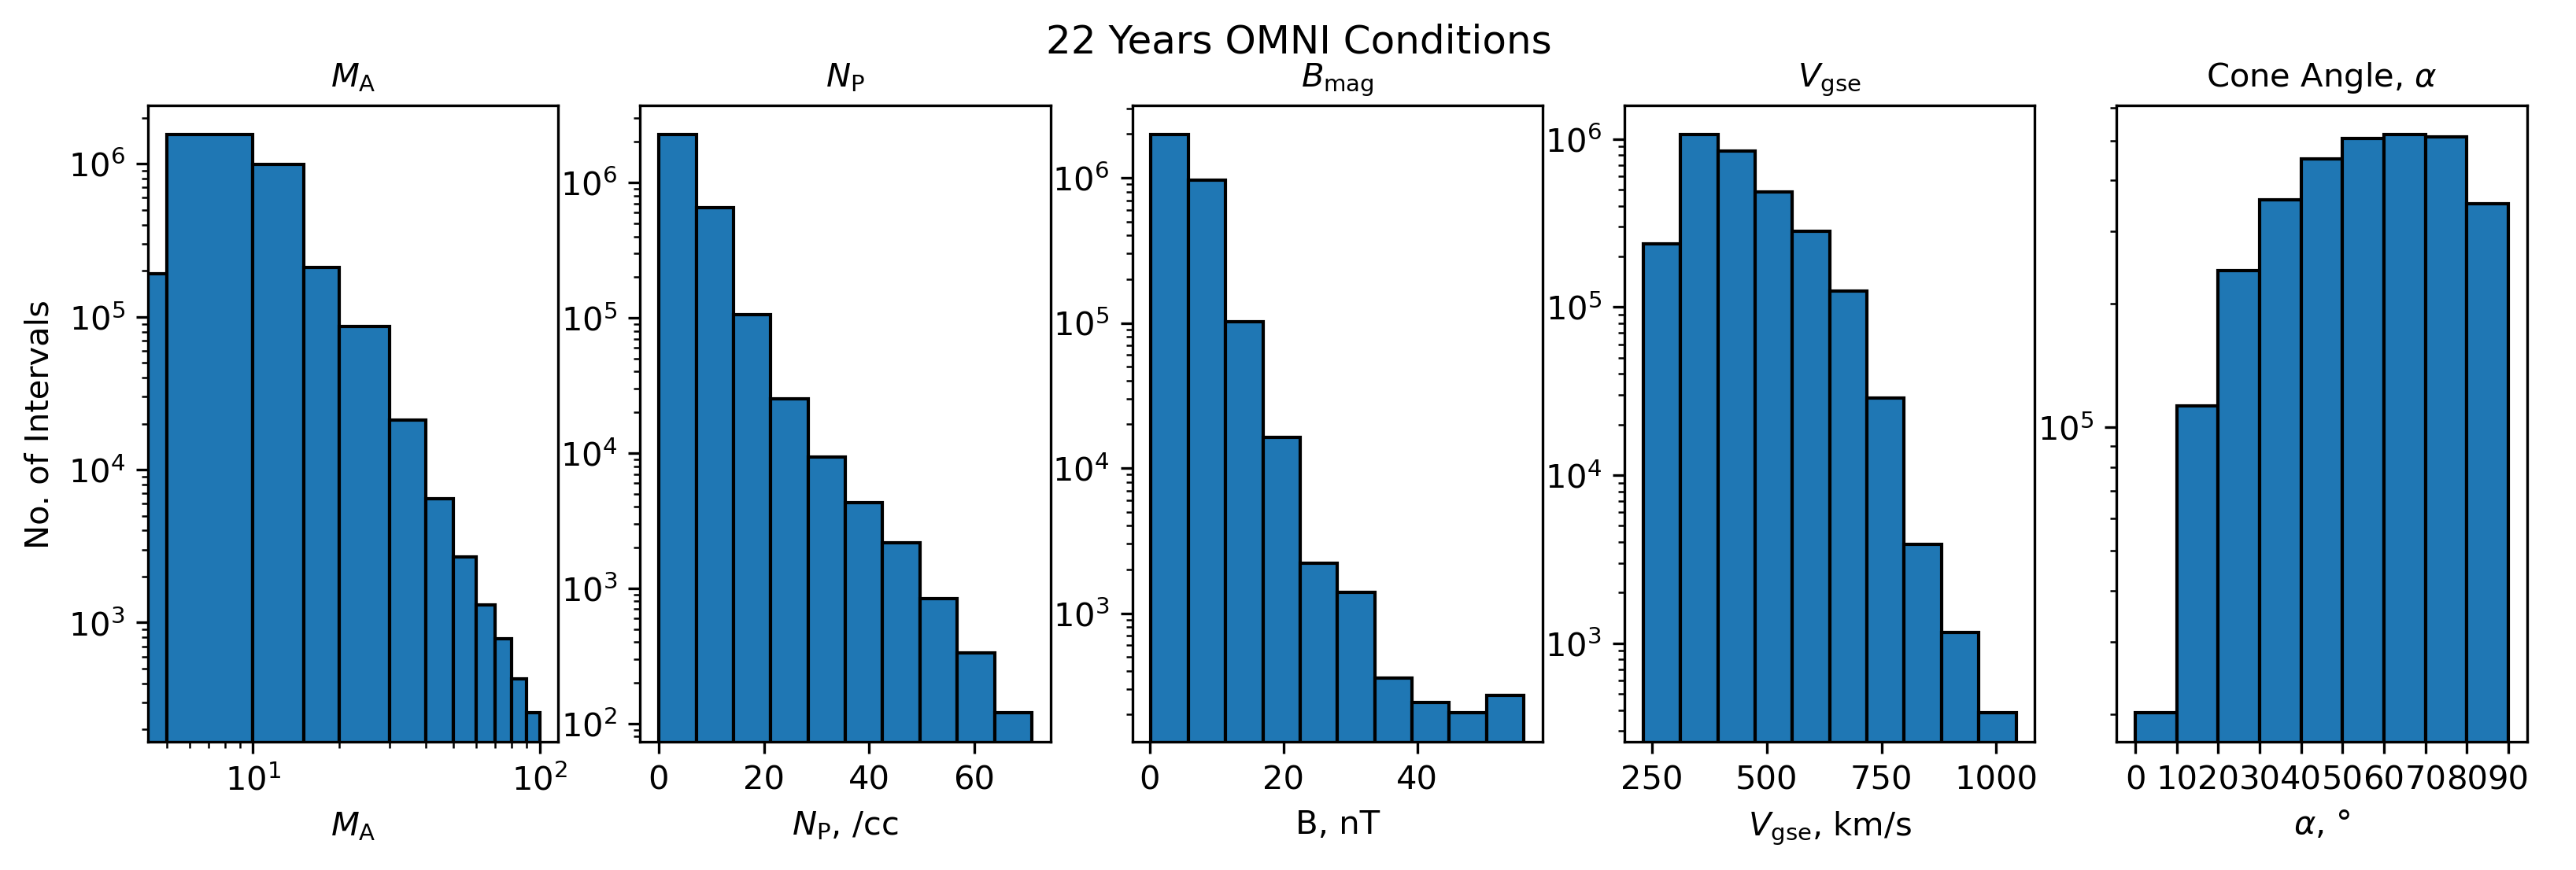

In [22]:
fig, ax = plt.subplots(figsize=(13, 3.5), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=False)
subfigs.suptitle(r'22 Years OMNI Conditions')

ax0 = axsLeft[0]

ax0.set_title(r'$M_\mathrm{A}$', fontsize=10)
ax0.hist(omni_all_nodup['M_A'], bins=[0,5,10,15,20,30,40,50,60,70,80,90,100], edgecolor='black')
ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.set_ylabel('No. of Intervals')
ax0.set_xlabel(r'$M_\mathrm{A}$')
#ax0.set_xlim(1,100)

ax1 = axsLeft[1]

ax1.set_title(r'$N_\mathrm{P}$', fontsize=10)
ax1.hist(omni_all_nodup['Np'], edgecolor='black')
ax1.set_yscale('log')
ax1.set_xlabel(r'$N_\mathrm{P}$, /cc')

ax2 = axsLeft[2]

ax2.set_title(r'$B_\mathrm{mag}$', fontsize=10)
ax2.hist(omni_all_nodup['B_mag'], edgecolor='black')
ax2.set_yscale('log')
ax2.set_xlabel(r'B, nT')

ax3 = axsLeft[3]

ax3.set_title(r'$V_\mathrm{gse}$', fontsize=10)
ax3.hist(omni_all_nodup['V_gse'], edgecolor='black')
ax3.set_yscale('log')
ax3.set_xlabel(r'$V_\mathrm{gse}$, km/s')

ax4 = axsLeft[4]

ax4.set_title(r'Cone Angle, $\alpha$', fontsize=10)
ax4.hist(omni_all_nodup['cone angle'], bins=[0,10,20,30,40,50,60,70,80,90],edgecolor='black')
ax4.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90], labels=['0','10','20','30','40','50','60','70','80','90'])
ax4.set_yscale('log')
ax4.set_xlabel(r'$\alpha$, $\degree$')

In [23]:
mean_spir_array = np.array(mean_rat_spir)
mean_spir_array = mean_spir_array.reshape(25, 52)

x_7_8 = mean_spir_array[8,:]
x_8_9 = mean_spir_array[9,:]
x_9_10 = mean_spir_array[10,:]
x_10_11 = mean_spir_array[11,:]
x_11_12 = mean_spir_array[12,:]
x_12_13 = mean_spir_array[13,:]
x_13_14 = mean_spir_array[14,:]

In [24]:
y_space = np.linspace(-25.5, 25.5, num=52)

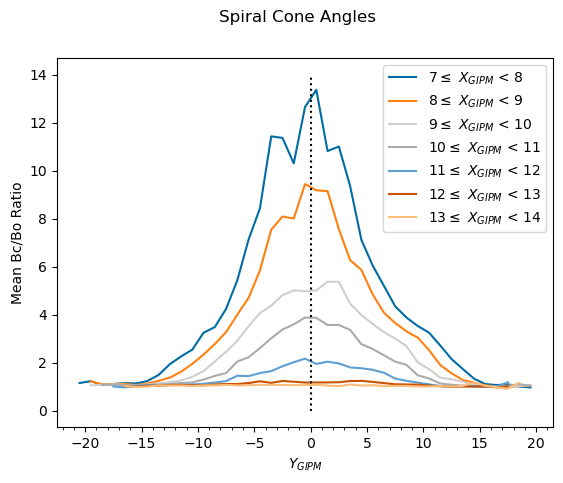

In [25]:
fig, ax1 = plt.subplots(1)
fig.suptitle(r'Spiral Cone Angles')
ax1.plot(y_space, x_7_8, color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space, x_8_9, color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space, x_9_10, color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space, x_10_11, color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space, x_11_12, color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space, x_12_13, color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space, x_13_14, color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend()

#fig.show()

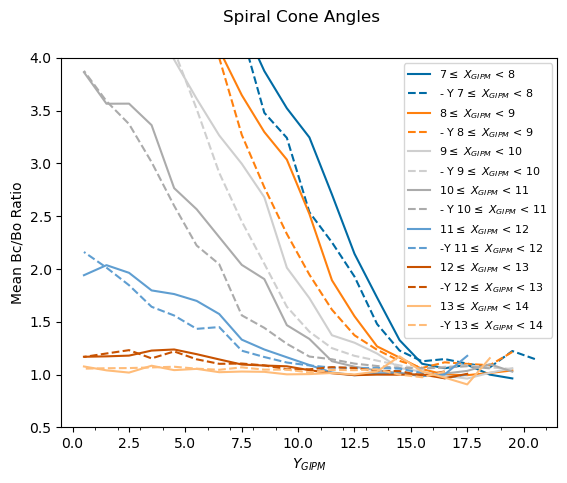

In [26]:
#now reflect negative y onto positive!
y_space_negative = np.linspace(25.5, 0.5, num=26)

fig, ax1 = plt.subplots(1)
fig.suptitle(r'Spiral Cone Angles')
ax1.plot(y_space[26:], x_7_8[26:], color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space_negative, x_7_8[0:26], color="#006BA4", linestyle='dashed', label=r'- Y 7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space[26:], x_8_9[26:], color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space_negative, x_8_9[0:26], linestyle='dashed', color="#FF800E", label=r'- Y 8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space[26:], x_9_10[26:], color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space_negative, x_9_10[0:26], color="#CFCFCF", linestyle='dashed', label=r'- Y 9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space[26:], x_10_11[26:], color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space_negative, x_10_11[0:26], color="#ABABAB", linestyle='dashed', label=r'- Y 10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space[26:], x_11_12[26:], color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space_negative, x_11_12[0:26], color="#5F9ED1", linestyle='dashed', label=r'-Y 11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space[26:], x_12_13[26:], color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space_negative, x_12_13[0:26], color="#C85200", linestyle='dashed', label=r'-Y 12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space[26:], x_13_14[26:], color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
ax1.plot(y_space_negative, x_13_14[0:26], color="#FFBC79",linestyle='dashed', label=r'-Y 13$\leq$ $X_{GIPM}$ < 14')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.set_ylim(0.5, 4)
#ax1.set_axisbelow(True)
#ax1.yaxis.grid(color='lightgray')
#ax1.xaxis.grid(color='lightgray')
#ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')

ax1.legend(fontsize=8)

#fig.show()

In [50]:
#plotting function with cuts

def binned_plot_cuts(rat_list, bin_size, angle):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle = np.tan(np.deg2rad(angle))
    
    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))


    ###################
    fig, ax0 = plt.subplots(1)
    fig.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023')

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(rat_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'$\alpha$ = 30-60 $\degree$')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin=0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    ax0.set_ylim(-23,23)
    ax0.set_xlim(0,22)
    ax0.vlines(x=[7.5,8.5,9.5,10.5,11.5,12.5,13.5], ymin = -26, ymax = 26, colors=["#006BA4","#FF800E","#CFCFCF","#ABABAB","#5F9ED1", "#C85200", "#FFBC79"] , label=r'7$\leq$ $X_{GIPM}$ < 8')
    ax0.invert_xaxis()
    ax0.invert_yaxis()
    ax0.xaxis.set_minor_locator(MultipleLocator(1))
    ax0.yaxis.set_minor_locator(MultipleLocator(1))
    
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='right', ax=ax0, extend='max', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #,anchor=(0.5, 0), panchor=(0.5, 0.4), pad=0.3, ax=axsLeft,
    #filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    #plt.savefig(filename, format='png', dpi = 300)

    plt.show()


In [99]:
#plotting function with cuts

def binned_plot_cuts_v2(rat_list, bin_size, angle):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle = np.tan(np.deg2rad(angle))
    
    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    if angle == 15:
        fig_title = r'Mean $B_\mathrm{CLUSTER}$/$B_\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023, $\alpha$ = 0-30 $\degree$'
    if angle == 45:
        fig_title = r'Mean $B_\mathrm{CLUSTER}$/$B_\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023, $\alpha$ = 30-60 $\degree$'
    if angle == 75:
        fig_title = r'Mean $B_\mathrm{CLUSTER}$/$B_\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023, $\alpha$ = 60-90 $\degree$'

    ###################
    fig, ax0 = plt.subplots(1, figsize=(9,5), constrained_layout=True)
    subfigs = fig.subfigures(1)
    fig.suptitle(fig_title)
    axsLeft = subfigs.subplots(1,2)
    #plt.subplots_adjust(wspace=0.5)
    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(rat_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[1]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    #ax0.set_title(r'$\alpha$ = 30-60 $\degree$')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin=0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    ax0.set_ylim(-23,23)
    ax0.set_xlim(0,22)
    ax0.vlines(x=[7.5,8.5,9.5,10.5,11.5,12.5,13.5], ymin = -26, ymax = 26, colors=["#006BA4","#FF800E","#CFCFCF","#ABABAB","#5F9ED1", "#C85200", "#FFBC79"] , label=r'7$\leq$ $X_{GIPM}$ < 8')
    ax0.invert_xaxis()
    ax0.invert_yaxis()
    ax0.xaxis.set_minor_locator(MultipleLocator(1))
    ax0.yaxis.set_minor_locator(MultipleLocator(1))
    
    ax1 = axsLeft[0]
    
    ax1.plot(y_space[26:], x_7_8[26:], color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
    ax1.plot(y_space_negative, x_7_8[0:26], color="#006BA4", linestyle='dashed', label=r'- Y 7$\leq$ $X_{GIPM}$ < 8')
    ax1.plot(y_space[26:], x_8_9[26:], color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
    ax1.plot(y_space_negative, x_8_9[0:26], linestyle='dashed', color="#FF800E", label=r'- Y 8$\leq$ $X_{GIPM}$ < 9')
    ax1.plot(y_space[26:], x_9_10[26:], color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
    ax1.plot(y_space_negative, x_9_10[0:26], color="#CFCFCF", linestyle='dashed', label=r'- Y 9$\leq$ $X_{GIPM}$ < 10')
    ax1.plot(y_space[26:], x_10_11[26:], color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
    ax1.plot(y_space_negative, x_10_11[0:26], color="#ABABAB", linestyle='dashed', label=r'- Y 10$\leq$ $X_{GIPM}$ < 11')
    ax1.plot(y_space[26:], x_11_12[26:], color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
    ax1.plot(y_space_negative, x_11_12[0:26], color="#5F9ED1", linestyle='dashed', label=r'-Y 11$\leq$ $X_{GIPM}$ < 12')
    ax1.plot(y_space[26:], x_12_13[26:], color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
    ax1.plot(y_space_negative, x_12_13[0:26], color="#C85200", linestyle='dashed', label=r'-Y 12$\leq$ $X_{GIPM}$ < 13')
    ax1.plot(y_space[26:], x_13_14[26:], color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
    ax1.plot(y_space_negative, x_13_14[0:26], color="#FFBC79",linestyle='dashed', label=r'-Y 13$\leq$ $X_{GIPM}$ < 14')
    ax1.set_ylabel(r'$B_\mathrm{CLUSTER}$/$B_\mathrm{OMNI}$')
    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.set_xlabel(r'$Y_{GIPM}$')
    ax1.set_ylim(0.8, 4)
    #ax1.set_axisbelow(True)
    #ax1.yaxis.grid(color='lightgray')
    #ax1.xaxis.grid(color='lightgray')
    #ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')

    ax1.legend(fontsize=7, loc='upper right')

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='right', ax=ax0, extend='max', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #,anchor=(0.5, 0), panchor=(0.5, 0.4), pad=0.3, ax=axsLeft,
    #filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    #plt.savefig(filename, format='png', dpi = 300)

    plt.show()


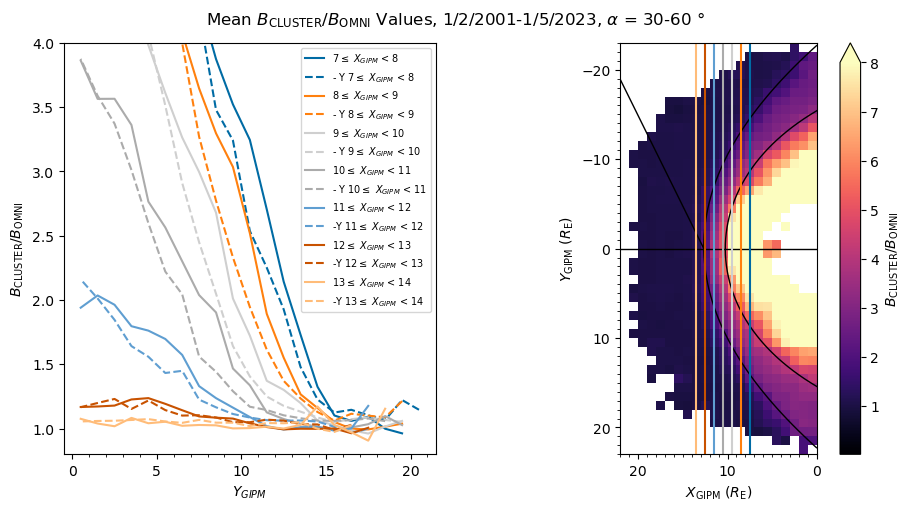

In [100]:
binned_plot_cuts_v2(mean_rat_spir, 1, 45)

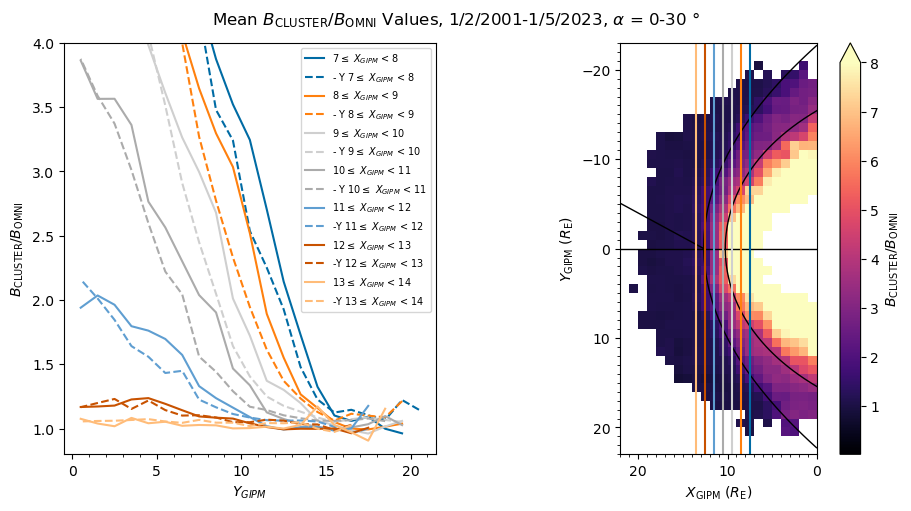

In [101]:
binned_plot_cuts_v2(mean_rat_rad, 1, 15)

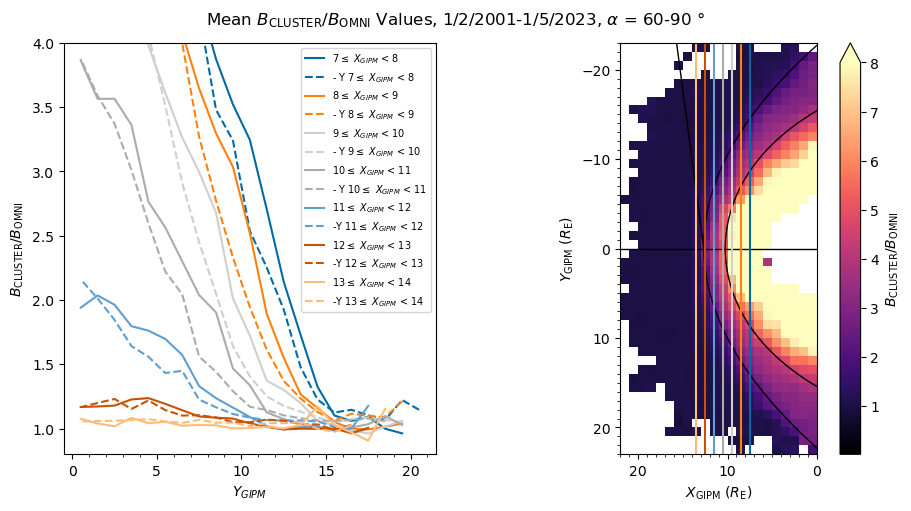

In [102]:
binned_plot_cuts_v2(mean_rat_perp, 1, 75)

In [37]:
y_space_negative = np.linspace(25.5, 0.5, num=26)

In [38]:
y_space_negative

array([25.5, 24.5, 23.5, 22.5, 21.5, 20.5, 19.5, 18.5, 17.5, 16.5, 15.5,
       14.5, 13.5, 12.5, 11.5, 10.5,  9.5,  8.5,  7.5,  6.5,  5.5,  4.5,
        3.5,  2.5,  1.5,  0.5])

In [39]:
mean_rad_array = np.array(mean_rat_rad)
mean_rad_array = mean_rad_array.reshape(25, 52)

x_7_8_rad = mean_rad_array[8,:]
x_8_9_rad = mean_rad_array[9,:]
x_9_10_rad = mean_rad_array[10,:]
x_10_11_rad = mean_rad_array[11,:]
x_11_12_rad = mean_rad_array[12,:]
x_12_13_rad = mean_rad_array[13,:]
x_13_14_rad = mean_rad_array[14,:]

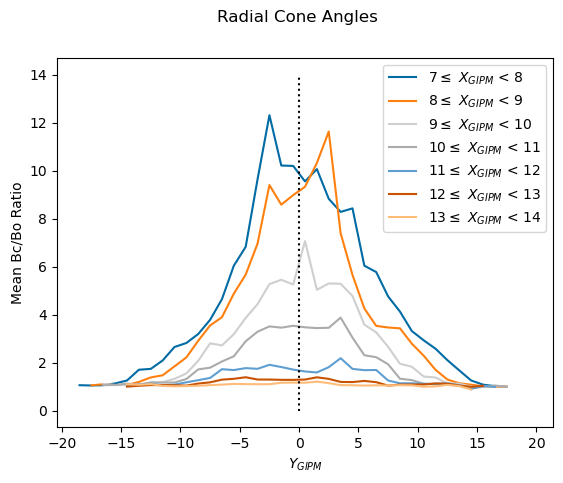

In [40]:
fig, ax1 = plt.subplots(1)
fig.suptitle(r'Radial Cone Angles')
ax1.plot(y_space, x_7_8_rad, color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space, x_8_9_rad, color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space, x_9_10_rad, color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space, x_10_11_rad, color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space, x_11_12_rad, color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space, x_12_13_rad, color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space, x_13_14_rad, color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.legend()

#fig.show()

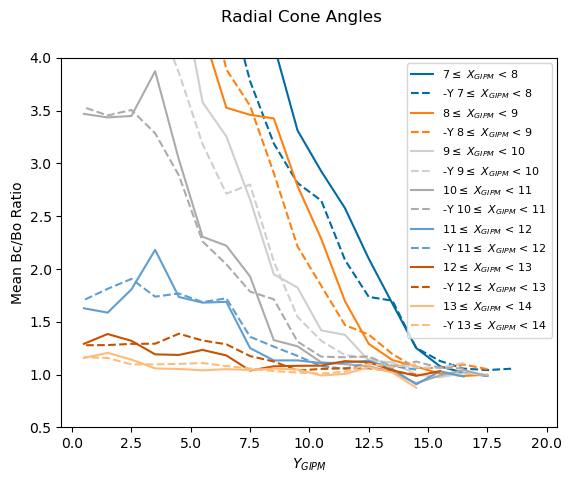

In [41]:
#now reflect negative y onto positive!
y_space_negative = np.linspace(25.5, 0.5, num=26)

fig, ax1 = plt.subplots(1)
fig.suptitle(r'Radial Cone Angles')
ax1.plot(y_space[26:], x_7_8_rad[26:], color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space_negative, x_7_8_rad[0:26], color="#006BA4", linestyle='dashed', label=r'-Y 7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space[26:], x_8_9_rad[26:], color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space_negative, x_8_9_rad[0:26], linestyle='dashed', color="#FF800E", label=r'-Y 8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space[26:], x_9_10_rad[26:], color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space_negative, x_9_10_rad[0:26], color="#CFCFCF", linestyle='dashed', label=r'-Y 9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space[26:], x_10_11_rad[26:], color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space_negative, x_10_11_rad[0:26], color="#ABABAB", linestyle='dashed', label=r'-Y 10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space[26:], x_11_12_rad[26:], color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space_negative, x_11_12_rad[0:26], color="#5F9ED1", linestyle='dashed', label=r'-Y 11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space[26:], x_12_13_rad[26:], color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space_negative, x_12_13_rad[0:26], color="#C85200", linestyle='dashed', label=r'-Y 12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space[26:], x_13_14_rad[26:], color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
ax1.plot(y_space_negative, x_13_14_rad[0:26], color="#FFBC79",linestyle='dashed', label=r'-Y 13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
#ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.set_ylim(0.5, 4)
ax1.legend(fontsize=8)

#fig.show()

In [ ]:
mean_perp_array = np.array(mean_rat_perp)
mean_perp_array = mean_perp_array.reshape(25, 52)

x_7_8_perp = mean_perp_array[8,:]
x_8_9_perp = mean_perp_array[9,:]
x_9_10_perp = mean_perp_array[10,:]
x_10_11_perp = mean_perp_array[11,:]
x_11_12_perp = mean_perp_array[12,:]
x_12_13_perp = mean_perp_array[13,:]
x_13_14_perp = mean_perp_array[14,:]

In [ ]:
fig, ax1 = plt.subplots(1)
fig.suptitle(r'Oblique Cone Angles')
ax1.plot(y_space, x_7_8_perp, color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space, x_8_9_perp, color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space, x_9_10_perp, color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space, x_10_11_perp, color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space, x_11_12_perp, color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space, x_12_13_perp, color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space, x_13_14_perp, color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.set_ylim(0.5,4)
ax1.legend()

#fig.show()

In [ ]:
#now reflect negative y onto positive!
y_space_negative = np.linspace(25.5, 0.5, num=26)

fig, ax1 = plt.subplots(1)
fig.suptitle(r'Oblique Cone Angles')
ax1.plot(y_space[26:], x_7_8_perp[26:], color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space_negative, x_7_8_perp[0:26], color="#006BA4", linestyle='dashed', label=r'- Y 7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space[26:], x_8_9_perp[26:], color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space_negative, x_8_9_perp[0:26], linestyle='dashed', color="#FF800E", label=r'- Y 8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space[26:], x_9_10_perp[26:], color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space_negative, x_9_10_perp[0:26], color="#CFCFCF", linestyle='dashed', label=r'- Y 9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space[26:], x_10_11_perp[26:], color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space_negative, x_10_11_perp[0:26], color="#ABABAB", linestyle='dashed', label=r'- Y 10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space[26:], x_11_12_perp[26:], color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space_negative, x_11_12_perp[0:26], color="#5F9ED1", linestyle='dashed', label=r'-Y 11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space[26:], x_12_13_perp[26:], color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space_negative, x_12_13_perp[0:26], color="#C85200", linestyle='dashed', label=r'-Y 12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space[26:], x_13_14_perp[26:], color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
ax1.plot(y_space_negative, x_13_14_perp[0:26], color="#FFBC79",linestyle='dashed', label=r'-Y 13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.set_ylim(0.5, 4)
#ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.legend(fontsize=8)

#fig.show()

In [ ]:
#plotting function

def binned_plot_cuts(rad_list, spir_list, perp_list, bin_size):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))


    ###################
    fig = plt.figure(figsize=(8, 6))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(1, 3, sharey=False)
    #gs = gridspec.GridSpec(2, 2)
    subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023,GIPM')

    #RADIAL

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(rad_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[0]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'$\alpha$ = 0-30$\degree$')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_0)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    #ax0.vlines(x=)
    ax0.set_ylim(-30,30)
    ax0.set_xlim(7,11)
    ax0.invert_xaxis()
    ax0.invert_yaxis()


    ax1 = axsLeft[1]

    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_1)

    #want to also have line for just solar wind flow along y=0


    col_array_1 = np.array(spir_list)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    ax1.set_aspect('equal')
    ax1.set_title(r'$\alpha$ = 30-60$\degree$')
    ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylim(-30,30)
    ax1.set_xlim(7,11)
    ax1.invert_xaxis()
    ax1.invert_yaxis()

    #fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=ax1)

    #PERP

    col_array_2 = np.array(perp_list)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2 = axsLeft[2]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_2)

    #want to also have line for just solar wind flow along y=0

    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    ax2.set_title(r'$\alpha$ = 60-90$\degree$')
    ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylim(-30,30)
    ax2.set_xlim(7,12)
    ax2.invert_xaxis()
    ax2.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.2, ax=axsLeft, label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #colorbar = subfigs.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft, location='bottom', label='Bcluster/Bomni')
    #plt.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)
    
    filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    plt.savefig(filename, format='png', dpi = 300)

    #plt.show()


In [ ]:
binned_plot_cuts(mean_rat_rad, mean_rat_spir, mean_rat_perp, 1)

In [ ]:
#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z'].to_numpy()

x_bin_edges = range(30)
y_bin_edges = range(-30,30)
z_bin_edges = range(-30,30)

##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan


histo_plot(HistXY_spir, HistXZ_spir, XMA_all, xedg, yedg, zedg,'Cluster Locations 1/1/2001-1/5/2023, Spiral Cone Angle, Low Z, 1RE bins',45)

In [ ]:
#BINNING SCRIPT


def bin_lister_all_stats(cluster_df):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z']> -5) & (cluster_df['GIPM Z'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??
    bin_size = 1
    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X']>= X_lb) & (cluster_df_XY['GIPM X'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y']>= Y_lb) & (mask['GIPM Y'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_ratio_perbin = []
    median_ratio_perbin = []
    #mode_ratio_perbin = []
    std_dev_ratio_perbin = []
    
    for j in bin_lists:
        #intermediate list for taking mean
        int_list_mean = []
        int_list_median = []
        #int_list_mode = []
        int_list_std_dev = []
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            mean_rat = mask['B median']
            int_list_mean.extend(mean_rat)
            median_rat = mask['B mean']
            int_list_median.extend(median_rat)
            std_rat = mask['B standard deviation']
            int_list_std_dev.extend(std_rat)
        
        if len(int_list_mean) >= 100:
            mean_mean_rat = sum(int_list_mean)/len(int_list_mean)
            mean_ratio_perbin.append(mean_mean_rat)
            mean_median_rat = sum(int_list_median)/len(int_list_median)
            median_ratio_perbin.append(mean_median_rat)
            #mean_mode_rat = sum(int_list_mode)/len(int_list_mode)
            #mode_ratio_perbin.append(mean_mode_rat)
            mean_std_dev_rat = sum(int_list_std_dev)/len(int_list_std_dev)
            std_dev_ratio_perbin.append(mean_std_dev_rat)
        else:
            mean_ratio_perbin.append(np.nan)
            median_ratio_perbin.append(np.nan)
            #mode_ratio_perbin.append(np.nan)
            std_dev_ratio_perbin.append(np.nan)
            
    return(mean_ratio_perbin, median_ratio_perbin, std_dev_ratio_perbin)


In [ ]:
def binned_plot_stats(mean_ratio, median_ratio, std_ratio, str_angle):
    
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re
    
    bin_size = 1
    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)
    #tanfieldangle = y/x
    
    if str_angle=='Radial':
        tan_angle = np.tan(np.deg2rad(15))
    if str_angle=='Spiral':
        tan_angle = np.tan(np.deg2rad(45))
    if str_angle=='Quasi-Perpendicular':
        tan_angle = np.tan(np.deg2rad(75))    

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    over_title = str_angle +' Cone Angle, Integrated ULF Power, 1/1/2023-1/5/2023, GIPM'

    norm = plt.Normalize(0,8)
    norm_std = plt.Normalize(0,2)

    ###################

    fig = plt.figure(figsize=(8, 6.5))
    #,layout='constrained'
    subfigs = fig.subfigures(1, 2, width_ratios = [2,1])
    fig.suptitle(over_title)
    axsLeft = subfigs[0].subplots(1, 2, sharey=True)
    axRight = subfigs[1].subplots(1, 1)

    #subfigs.suptitle('FFT Intervals, Spiral Cone Angles, 1/1/2023-1/5/2023,GIPM')

    #MEAN

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(mean_ratio)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[0]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'Mean Compression')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    #ax0.vlines(x=)
    ax0.set_ylim(-30,30)
    ax0.set_xlim(0,25)
    ax0.invert_xaxis()
    ax0.invert_yaxis()


    ax1 = axsLeft[1]

    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    col_array_1 = np.array(median_ratio)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    ax1.set_aspect('equal')
    ax1.set_title(r'Median Compression')
    ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylim(-30,30)
    ax1.set_xlim(0,25)
    ax1.invert_xaxis()
    ax1.invert_yaxis()

    #fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=ax1)

    #PERP

    col_array_2 = np.array(std_ratio)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2 = axRight

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='viridis', norm=norm_std)
    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    ax2.set_title(r'Standard Deviation')
    ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylim(-30,30)
    ax2.set_xlim(0,25)
    ax2.invert_xaxis()
    ax2.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.2, ax=axsLeft, label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    fig.colorbar(cm.ScalarMappable(norm=norm_std, cmap='viridis'),location='bottom', ax=axRight, pad=0.2,anchor=(0.5, 0), panchor=(0.5, 0.2), label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$', aspect=10)
    
    filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    plt.savefig(filename, format='png', dpi = 300)

    #plt.show()



In [ ]:
mean_r_spir, median_r_spir, std_dev_r_spir = bin_lister_all_stats(df_spiral)

In [ ]:
binned_plot_stats(mean_r_spir, median_r_spir, std_dev_r_spir, 'Spiral')